# Linear Regresion with a DL mindset

- Israel Sánchez Miranda A01378705
- Erick Hernández Silva A01750170
- Salette Guadalupe Noemi Villalobos A01246619

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We generated a sample dataset based on the relationship $y = 3.5 x$ with added noise. The true slope is $3.5$ and the intercept is $0$.

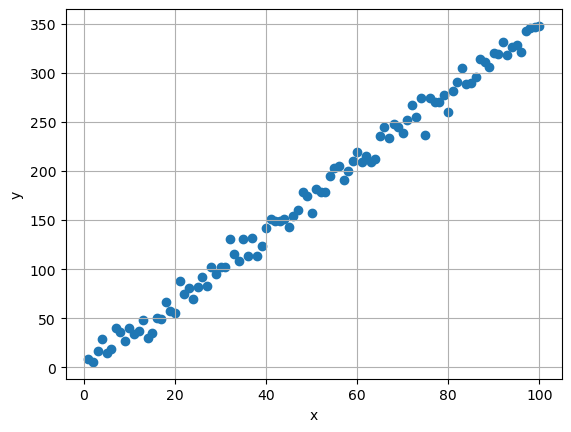

In [2]:
np.random.seed(42)

x = np.arange(1, 101)
y = 3.5 * x + np.random.normal(0, 10, size=len(x))

plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Next we define a function to predict the $y$ value based on the input $x$, its weight $w$ and bias $b$

In [ ]:
def predict(x, w, b):
  return w * x + b # y = w * X + b

We also define a loss function, which is the MSE.

In [4]:
def avg_loss(x, y, w, b):
    y_pred = predict(x, w, b)
    return np.mean((y - y_pred) ** 2)  # Vectorized MSE calculation

## Traditional Implementation

We applied the normal equation, which provides a direct solution by minimizing the sum of squared residuals. The equation is given by:
$$\theta = \left( X^T X \right)^{-1} X^T y$$
where $\theta$ represents the parameter vector that minimizes the loss function.

In [5]:
def traditional(X, y):
    
    # Add bias term to X
    X_b = np.c_[np.ones((X.shape[0])), X]

    # Calculate parameters using normal equation
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    b = theta[0]
    w = theta[1]

    return w, b


We tested the method with a new input value of $145$. The true output was $507.50$, while our model predicted $507.78$, resulting a small error of $0.28$. The mean squared error (MSE) loss was $81.49$.

In [6]:
w_trad, b_trad = traditional(x, y)
x_new = 145
y_new = predict(x_new, w_trad, b_trad)
loss_trad = avg_loss(x, y, w_trad, b_trad)
print(f'Predicted value: {y_new:.2f}, Loss: {loss_trad:.2f}')

Predicted value: 507.78, Loss: 81.49


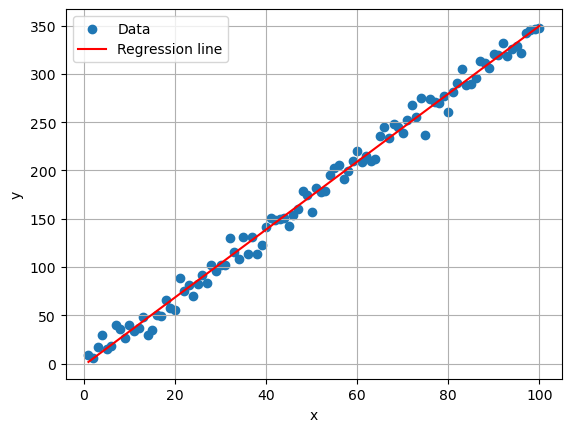

In [7]:
plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, predict(x, w_trad, b_trad), c='red', label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

## Gradient Descent Implementation

Gradient descent is an iterative optimization method that is more efficient for large datasets. It updates parameters by taking small steps in the direction that minimizes the error, with the step size controlled by the learning rate and the direction determined by the partial derivatives of the loss function with respect to the parameters.

In [8]:
def update_w_and_b(x, y, w, b, alpha):
    n = len(x)
    
    # Vectorized gradient computation
    y_pred = predict(x, w, b)
    error = y - y_pred
    
    dl_dw = (-2 / n) * np.dot(x, error)  # Equivalent to sum(-2 * x * (y - y_pred)) / n
    dl_db = (-2 / n) * np.sum(error)     # Equivalent to sum(-2 * (y - y_pred)) / n
    
    # Update weights
    w -= alpha * dl_dw
    b -= alpha * dl_db
    
    return w, b

In [9]:
def train(x, y, w, b, alpha, epochs):
  for epoch in range(epochs):
    w, b = update_w_and_b(x, y, w, b, alpha)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {avg_loss(x, y, w, b)}")
  return w, b

We used the same test value as before. After $150$ iterations with a learning rate of $0.00001$ the predicted value was $505.67$, resulting in a difference of $1.83$ from the true value and an MSE of $82.28$.

In [10]:
w, b = train(x, y, 0.0, 0.0, 0.00001, 150)
x_new = 145
y_new = predict(x_new, w, b)
print(y_new)

Epoch: 0, Loss: 35861.17742345436
Epoch: 10, Loss: 8890.330459027766
Epoch: 20, Loss: 2250.6479084764237
Epoch: 30, Loss: 616.0909505004078
Epoch: 40, Loss: 213.6956969688667
Epoch: 50, Loss: 114.63398379314093
Epoch: 60, Loss: 90.24691468262415
Epoch: 70, Loss: 84.24324775390713
Epoch: 80, Loss: 82.76520636159955
Epoch: 90, Loss: 82.40128336661084
Epoch: 100, Loss: 82.31163401910163
Epoch: 110, Loss: 82.28950535767515
Epoch: 120, Loss: 82.28399894300081
Epoch: 130, Loss: 82.28258459844237
Epoch: 140, Loss: 82.28217764540011
505.67700781117236


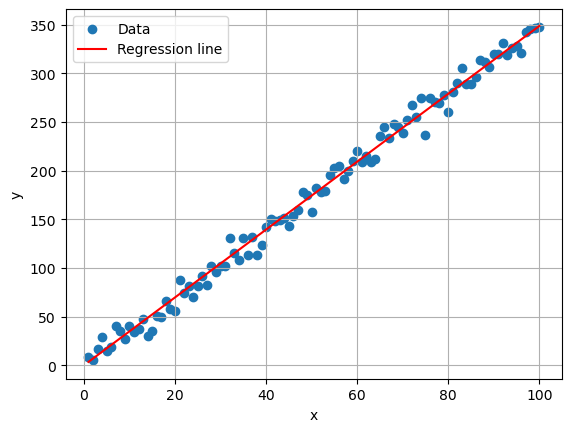

In [11]:
plt.figure()
plt.scatter(x, y, label="Data")
plt.plot(x, predict(x, w, b), c='red', label="Regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()